# Sharpen
Try to sharpen images

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/MyDrive/M_DV_V2022

Mounted at /content/gdrive
/content/gdrive/MyDrive/M_DV_V2022


### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, Flatten, \
                         UpSampling2D, Conv2DTranspose, MaxPooling2D, \
                         Dropout

### Load data

In [3]:
X = np.load("sharpen/X_data.npy")
y = np.load("sharpen/y_data.npy")

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [4]:
snitt = X_train.mean()
var = X_train.var()

snitt_y = y_train.mean()
var_y = y_train.var()

#X_train = (X_train - snitt) / var
#X_test = (X_test - snitt) / var

#y_train = (y_train - snitt_y) / var_y
#y_test = (y_test - snitt_y) / var_y

### Show data

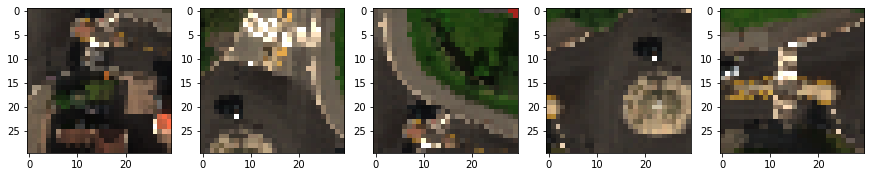

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize = (15,15))

indx = np.random.randint(0,high=X.shape[0],size=5)
for i,axis in enumerate(ax):
  axis.imshow(X[indx[i]])
plt.show()



### Make model

In [5]:
model = Sequential()

model.add(Input(shape=(30,30,3)))
model.add(Conv2D(32, kernel_size=3, activation='relu',
                     padding='valid'))
model.add(MaxPooling2D(2))
model.add(Conv2DTranspose(32, kernel_size=3, activation='relu',
                padding='same'))
model.add(UpSampling2D(5))
model.add(Conv2D(32, kernel_size=3, activation='relu',
                 padding='same'))
model.add(Conv2D(32, kernel_size=3, activation='relu',
                 padding='same'))

model.add(Conv2D(3, kernel_size=3, activation='sigmoid',
                 padding='same'))

#model.add(Conv2DTranspose(32, kernel_size=3, padding="same"))
#model.add(UpSampling2D(3))

model.summary()
model.compile(optimizer='adam',
              loss='mse')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)       9248      
 nspose)                                                         
                                                                 
 up_sampling2d (UpSampling2D  (None, 70, 70, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 70, 70, 32)        9248      
                                                        

## Train model

In [6]:
history = model.fit(X_train,y_train,
                    validation_data=(X_test,y_test),
                    epochs=200, batch_size=10, verbose=1)

Epoch 1/200
4/4 [==============================] - 9s 88ms/step - loss: 0.0953 - val_loss: 0.0877
Epoch 2/200
4/4 [==============================] - 0s 33ms/step - loss: 0.0785 - val_loss: 0.0646
Epoch 3/200
4/4 [==============================] - 0s 30ms/step - loss: 0.0584 - val_loss: 0.0595
Epoch 4/200
4/4 [==============================] - 0s 33ms/step - loss: 0.0590 - val_loss: 0.0587
Epoch 5/200
4/4 [==============================] - 0s 33ms/step - loss: 0.0560 - val_loss: 0.0543
Epoch 6/200
4/4 [==============================] - 0s 32ms/step - loss: 0.0521 - val_loss: 0.0524
Epoch 7/200
4/4 [==============================] - 0s 33ms/step - loss: 0.0500 - val_loss: 0.0494
Epoch 8/200
4/4 [==============================] - 0s 28ms/step - loss: 0.0471 - val_loss: 0.0456
Epoch 9/200
4/4 [==============================] - 0s 29ms/step - loss: 0.0426 - val_loss: 0.0407
Epoch 10/200
4/4 [==============================] - 0s 28ms/step - loss: 0.0373 - val_loss: 0.0341
Epoch 11/200
4/4 [=

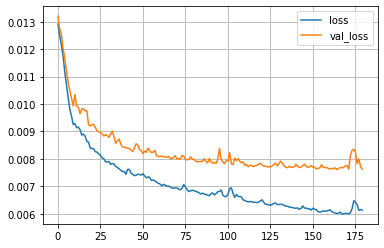

In [7]:
plt.plot(history.history['loss'][20:], label="loss")
plt.plot(history.history['val_loss'][20:], label="val_loss")
plt.legend()
plt.grid()

Text(0.5, 1.0, 'Predicted')

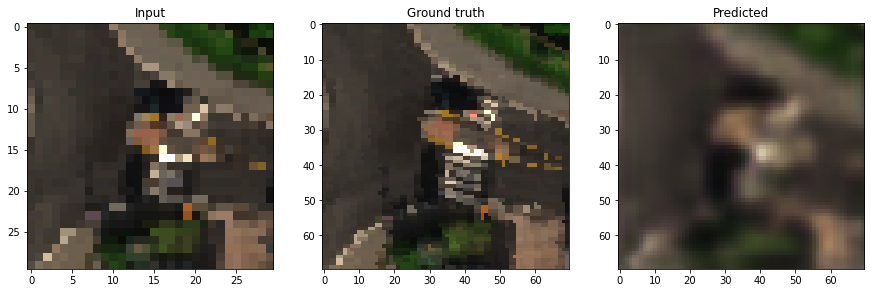

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1,ncols=3, figsize = (15,15))
ax1.imshow(X_test[2:3][0][:,:,:])
ax1.set_title("Input")
ax2.imshow(y_test[2:3][0][:,:,:])
ax2.set_title("Ground truth")
ax3.imshow(model.predict(X_test[2:3])[0][:,:,:])
ax3.set_title("Predicted")